# Predictions statistics

Let's analyse the predictions made on our test datasplit.

**Note** To run this notebook you previously have to run and save the predictions on a test dataset **with ground-truth labels**. See the Datasplit section in [3.0 notebook](./3.0-Computing_predictions.ipynb#Predicting-a-datasplit-txt-file) for reference.


In [1]:
import os
import json
import numpy as np

from imgclas.data_utils import load_image
from imgclas import paths, plot_utils

import warnings
warnings.filterwarnings("ignore") # To ignore UndefinedMetricWarning: [Recall/Precision/F-Score] is ill-defined and being set to 0.0 in labels with no [true/predicted] samples.

# User parameters to set
TIMESTAMP = '2021-10-26_Lab_All_Copas_All_reg'           # timestamp of the model
# SPLIT_NAME = 'testLaRiojaICVVCopasAll'                   # dataset split to predict
SPLIT_NAME = 'test'
MODEL_NAME = 'final_model.h5'         # model to use to make the mediction

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load back the predictions
pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}.json'.format(MODEL_NAME, SPLIT_NAME))
with open(pred_path) as f:
    pred_dict = json.load(f)

## Computing the metrics

Check [sklearn](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) for more classification metrics.

In [2]:
from imgclas import test_utils
import sklearn.metrics as metrics
# https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

y, yhat = np.array(pred_dict['true_value']), np.array(pred_dict['pred_value'])

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 8.198912535649448
MSE: 132.59822986895483
RMSE: 11.515130475550627
R-Squared: 0.9772781830742008


## Computing the confusion matrix

In [3]:
'''
Round a list of numbers to the closer 25th (i.e. 0, 25, 50, 75, etc.)

It is important to note that x.5 will be rounded to x instead of x+1 in the current 3.6.8 Python version.
For more details see https://stackoverflow.com/questions/10825926/python-3-x-rounding-behavior
'''

def myround_list(x, base=25):
    y=[]
    for i in x:
        y.append(round(base * round(float(i)/base)))
    return y

In [4]:
import matplotlib.pylab as plt
import seaborn
from sklearn.metrics import confusion_matrix


def plt_conf_matrix(conf_mat,  name, labels=False):
    
    fig = plt.figure(figsize=(20, 20))
    hm = seaborn.heatmap(conf_mat, annot=True, square=True, cbar_kws={'fraction':0.046, 'pad':0.04},
                         xticklabels=labels, yticklabels=labels, cmap=plt.cm.Blues, fmt=".2f")
    fontsize = None
    hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=fontsize)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#     plt.savefig('/srv/image-results/'+name+'_confussionMatrix.jpg')

### Standard confusion matrix

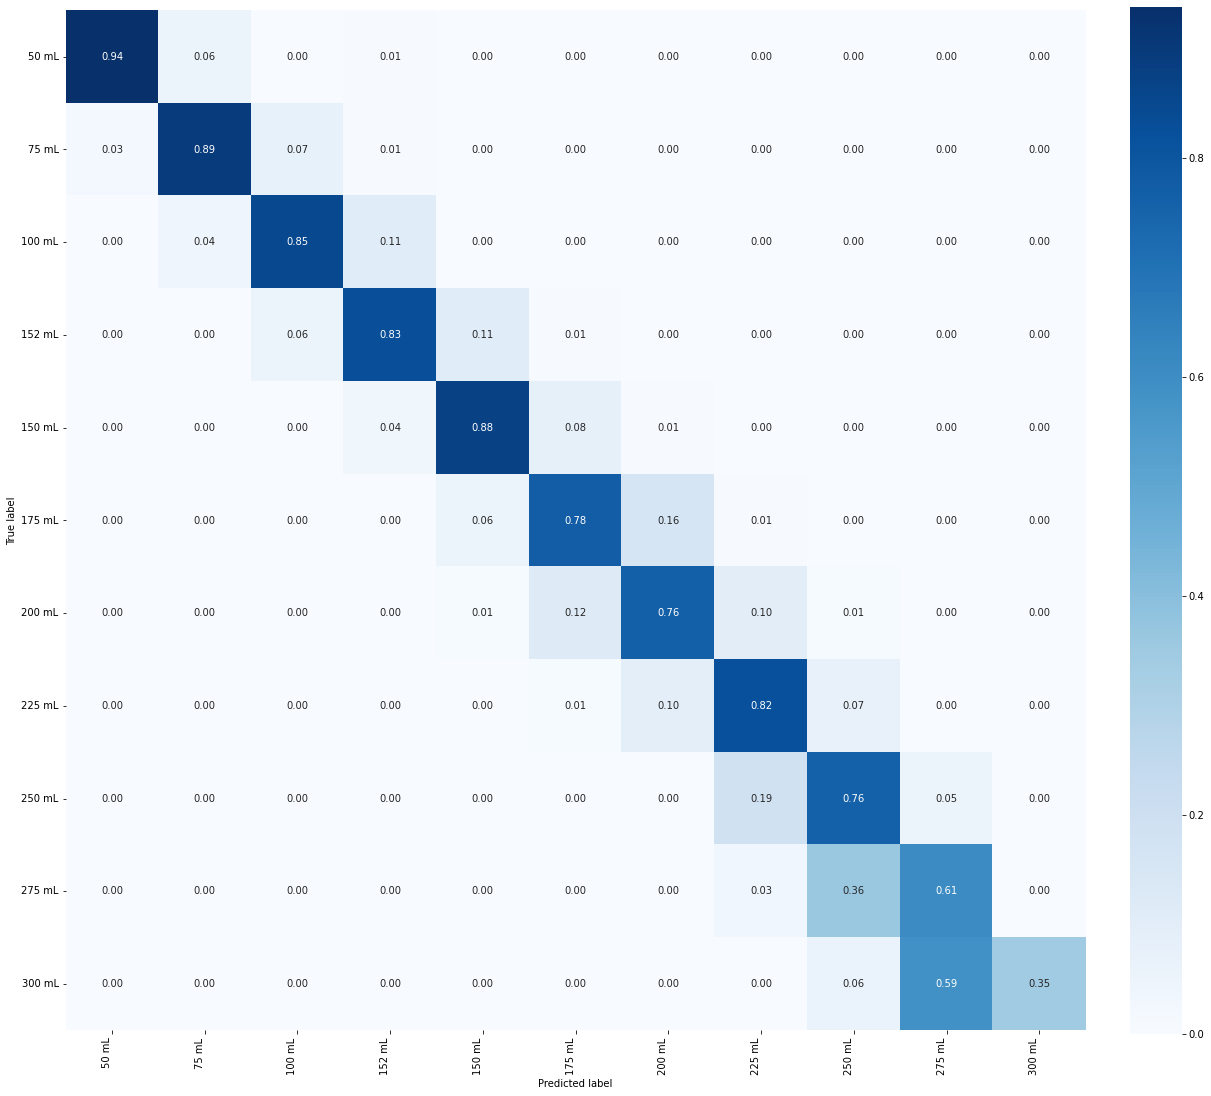

In [5]:
y_true, y_pred = np.array(pred_dict['true_value']), np.array(myround_list(pred_dict['pred_value']))
conf_mat = confusion_matrix(y_true, y_pred, sample_weight=None)
normed_conf = conf_mat / np.sum(conf_mat, axis=1)[:, np.newaxis]

# plt_conf_matrix(conf_mat)
plt_conf_matrix(normed_conf, labels=["50 mL", "75 mL", "100 mL", "152 mL", "150 mL",
                                    "175 mL", "200 mL", "225 mL", "250 mL", "275 mL",
                                    "300 mL"], name='Madrid_copasAll')

## Volunteers' images

In [2]:
import os
import json
import numpy as np

from imgclas.data_utils import load_image
from imgclas import paths, plot_utils

import warnings
warnings.filterwarnings("ignore") # To ignore UndefinedMetricWarning: [Recall/Precision/F-Score] is ill-defined and being set to 0.0 in labels with no [true/predicted] samples.

# User parameters to set
TIMESTAMP = '2021-10-26_Lab_All_Copas_All_reg'           # timestamp of the model
# SPLIT_NAME = 'testLaRiojaICVVCopasAll'                   # dataset split to predict
SPLIT_NAME = 'copasVoluntarios'
MODEL_NAME = 'final_model.h5'         # model to use to make the mediction

# Set the timestamp
paths.timestamp = TIMESTAMP

# Load back the predictions
pred_path = os.path.join(paths.get_predictions_dir(), '{}+{}.json'.format(MODEL_NAME, SPLIT_NAME))
with open(pred_path) as f:
    pred_dict = json.load(f)

## Computing the metrics

Check [sklearn](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) for more classification metrics.

In [2]:
from imgclas import test_utils
import sklearn.metrics as metrics
# https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b

y, yhat = np.array(pred_dict['true_value']), np.array(pred_dict['pred_value'])

mae = metrics.mean_absolute_error(y, yhat)
mse = metrics.mean_squared_error(y, yhat)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y,yhat)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

MAE: 38.50069837216978
MSE: 2233.46934886518
RMSE: 47.25959531000218
R-Squared: -2.700452625733447


## Computing the confusion matrix

In [3]:
'''
Round a list of numbers to the closer 25th (i.e. 0, 25, 50, 75, etc.)

It is important to note that x.5 will be rounded to x instead of x+1 in the current 3.6.8 Python version.
For more details see https://stackoverflow.com/questions/10825926/python-3-x-rounding-behavior
'''

def myround_list(x, base=25):
    y=[]
    for i in x:
        y.append(round(base * round(float(i)/base)))
    return y

In [4]:
import matplotlib.pylab as plt
import seaborn
from sklearn.metrics import confusion_matrix


def plt_conf_matrix(conf_mat,  name, labels=False):
    
    fig = plt.figure(figsize=(20, 20))
    hm = seaborn.heatmap(conf_mat, annot=True, square=True, cbar_kws={'fraction':0.046, 'pad':0.04},
                         xticklabels=labels, yticklabels=labels, cmap=plt.cm.Blues, fmt=".2f")
    fontsize = None
    hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=90, ha='right', fontsize=fontsize)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#     plt.savefig('/srv/image-results/'+name+'_confussionMatrix.jpg')

### Standard confusion matrix

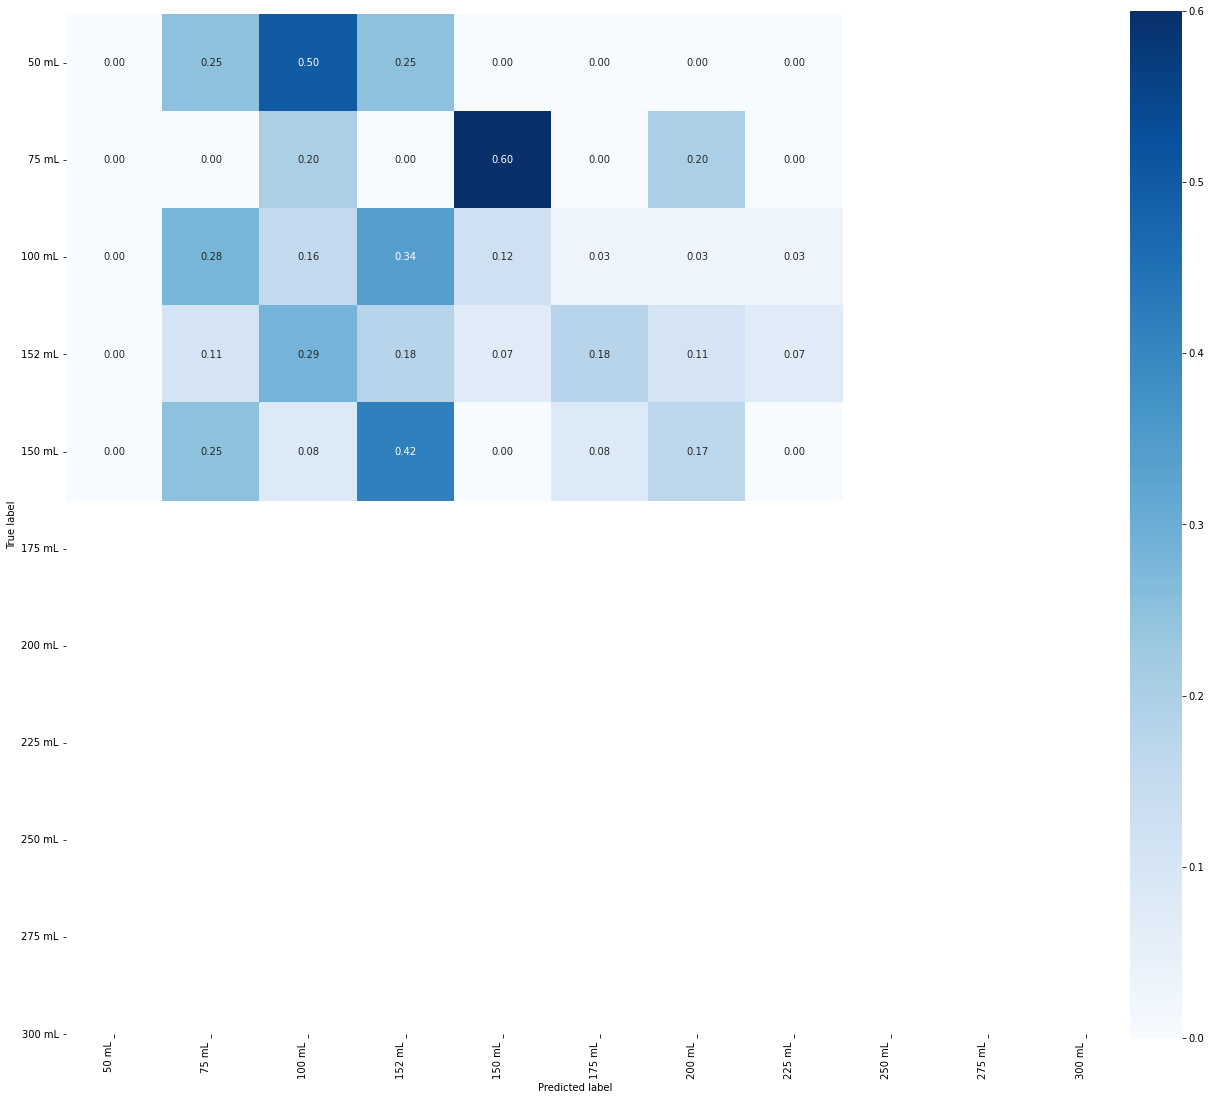

In [11]:
y_true, y_pred = np.array(pred_dict['true_value']), np.array(myround_list(pred_dict['pred_value']))
conf_mat = confusion_matrix(y_true, y_pred, sample_weight=None)
normed_conf = conf_mat / np.sum(conf_mat, axis=1)[:, np.newaxis]

# plt_conf_matrix(conf_mat)
plt_conf_matrix(normed_conf, labels=["50 mL", "75 mL", "100 mL", "152 mL", "150 mL",
                                    "175 mL", "200 mL", "225 mL", "250 mL", "275 mL",
                                    "300 mL"], name='Madrid_copasAll')

In [4]:
'''
Round a number to the closer 25th (i.e. 0, 25, 50, 75, etc.)

It is important to note that x.5 will be rounded to x instead of x+1 in the current 3.6.8 Python version.
For more details see https://stackoverflow.com/questions/10825926/python-3-x-rounding-behavior
'''

def myround(x, base=25):
    return round(base * round(float(x)/base))

In [5]:
# save images that are wrong predicted in a list,
# to see if they share a pattern
right_predictions=[]
for i in range(len(pred_dict['true_value'])):
    if myround(pred_dict['pred_value'][i])==pred_dict['true_value'][i]:
        right_predictions.append(pred_dict['filenames'][i])

In [7]:
# save images that are wrong predicted in a list,
# to see if they share a pattern
wrong_predictions=[]
for i in range(len(pred_dict['true_value'])):
    if myround(pred_dict['pred_value'][i])!=pred_dict['true_value'][i]:
        wrong_predictions.append(pred_dict['filenames'][i])

In [8]:
len(wrong_predictions) # hay 81 fotos de voluntarios, solo predice correctamente 10

71

In [10]:
wrong_predictions

['/srv/datos/Voluntarios/5c61f838-32bc-4faa-858d-a215981d0618_otra_crianza_125_copa_cata_almuerzo_14-06-2021_13-22-58.jpg',
 '/srv/datos/Voluntarios/9a4bbc89-d0e6-4a7c-98af-2e588d9ae21b_otra_crianza_100_copa_chard_fuera_29-05-2021_18-30-51.jpg',
 '/srv/datos/Voluntarios/7f197478-71bd-4720-a295-65d443ff12bf_otra_crianza_125_copa_cata_almuerzo_11-06-2021_12-03-55.jpg',
 '/srv/datos/Voluntarios/7f197478-71bd-4720-a295-65d443ff12bf_otra_crianza_125_copa_cata_almuerzo_18-06-2021_12-05-48.jpg',
 '/srv/datos/Voluntarios/8ec17b0f-b668-49d7-8d6e-9799c5601a30_otra_crianza_50_copa_borg_almuerzo_02-06-2021_13-32-47.jpg',
 '/srv/datos/Voluntarios/7f197478-71bd-4720-a295-65d443ff12bf_otra_crianza_125_copa_cata_almuerzo_23-06-2021_15-52-27.jpeg',
 '/srv/datos/Voluntarios/7f197478-71bd-4720-a295-65d443ff12bf_otra_crianza_125_copa_cata_almuerzo_25-06-2021_13-55-07.jpeg',
 '/srv/datos/Voluntarios/2430bc93-a971-489d-b02f-ecaf4b3c16ce_rioja_reserva_125_copa_borg_fuera_18-05-2021_14-09-44.jpg',
 '/srv/dato

In [5]:
# save images that are wrong predicted in a list,
# to see if they share a pattern
right_predictions=[]
for i in range(len(pred_dict['true_value'])):
    if myround(pred_dict['pred_value'][i])==pred_dict['true_value'][i]:
        right_predictions.append(pred_dict['filenames'][i])

In [6]:
right_predictions

['/srv/datos/Voluntarios/5c61f838-32bc-4faa-858d-a215981d0618_otra_crianza_100_copa_cata_almuerzo_04-06-2021_14-53-53.jpg',
 '/srv/datos/Voluntarios/55d0096d-a472-4f19-95e3-cabaeac690d4_otra_joven_100_copa_burd_cena_11-06-2021_20-03-38.jpeg',
 '/srv/datos/Voluntarios/5c61f838-32bc-4faa-858d-a215981d0618_otra_joven_100_copa_cata_cena_22-06-2021_21-03-30.jpg',
 '/srv/datos/Voluntarios/199d1910-3834-4c76-a14f-f44ad9f6e9dc_madrid_crianza_125_copa_balon_cena_22-06-2021_18-20-22.jpeg',
 '/srv/datos/Voluntarios/2430bc93-a971-489d-b02f-ecaf4b3c16ce_rioja_reserva_125_copa_borg_fuera_18-05-2021_14-08-57.jpg',
 '/srv/datos/Voluntarios/7f197478-71bd-4720-a295-65d443ff12bf_otra_crianza_125_copa_cata_almuerzo_24-06-2021_11-38-45.jpeg',
 '/srv/datos/Voluntarios/5c61f838-32bc-4faa-858d-a215981d0618_otra_crianza_125_copa_cata_cena_19-06-2021_20-41-32.jpg',
 '/srv/datos/Voluntarios/cfc2a9a8-cf03-461b-8e50-63d3b28c6366_otra_crianza_100_copa_cata_cena_15-06-2021_20-04-49.jpg',
 '/srv/datos/Voluntarios/8ec